# Description: This notebook performs data preprocessing and feature engineering for the heart disease dataset.

Content:

 - Attribute types (тип на атрибутите)
 - Attribute statistics (статистически характеристики, описващи атрибутите)
 - Missing values (липсващи стойности на атрибути)
 - Outliers (крайни (екстремални) стойности)
 - Exploratory data analysis (анализ на зависимостите, илюстрирани с подходящи визуализации)
 - Choosing the best attributes (избор на атрибутите, които предвиждат сърдечно- съдови заболявания)


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

## Uploading the data set

In [2]:
df = pd.read_csv('/content/heart-disease.csv') # Assuming it is preloaded in Google Colab
df.head()

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
0,63,male,typical ang,145,233,1,left vent hypertrophy,150,0,2.3,downsloping,0,fixed defect,0
1,67,male,asymptomatic,160,286,0,left vent hypertrophy,108,1,1.5,flat,3,normal,1
2,67,male,asymptomatic,120,229,0,left vent hypertrophy,129,1,2.6,flat,2,reversable defect,1
3,37,male,non-anginal,130,250,0,normal,187,0,3.5,downsloping,0,normal,0
4,41,female,atypical ang,130,204,0,left vent hypertrophy,172,0,1.4,upsloping,0,normal,0


# Attribute types (тип на атрибутите)

In [3]:
df.shape

(303, 14)

We see that we have 303 entries with 14 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   gender                     303 non-null    object 
 2   chest pain                 303 non-null    object 
 3   rest SBP                   303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting blood sugar > 120  303 non-null    int64  
 6   rest ECG                   303 non-null    object 
 7   max HR                     303 non-null    int64  
 8   exerc ind ang              303 non-null    int64  
 9   ST by exercise             303 non-null    float64
 10  slope peak exc ST          303 non-null    object 
 11  major vessels colored      303 non-null    object 
 12  thal                       303 non-null    object 
 13  diameter narrowing         303 non-null    int64  

In [5]:
df.describe()

,age,rest SBP,cholesterol,fasting blood sugar > 120,max HR,exerc ind ang,ST by exercise,diameter narrowing
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.458746
std,9.038662,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.499120
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000


We see that we have numerical as well as categorical features:

> **numerical**: *age*, *rest SBP*, *cholesterol*, *max HR*, *ST by exercise*.

> **categorical**: *gender*, *chest pain*, *fasting blood sugar > 120*, *rest ECG*, *exerc ind ang*, *slope peak exc ST*, *major vessels colored*, *thal*.

Usually the numerical features need to be scaled down using StandardScaler() in order to follow a standard normal distribution and the categorical features could be converted into dummy variables using the the get_dummies functing provided in pandas.

# Attribute statistics (статистически характеристики, описващи атрибутите)

In [6]:
df.gender.value_counts()

male      206
female     97
Name: gender, dtype: int64

**206 males and 97 females**

In [7]:
df['diameter narrowing'].value_counts()

0    164
1    139
Name: diameter narrowing, dtype: int64

**139 cases of diameter narrowing**

In [8]:
df.thal.value_counts()

normal               166
reversable defect    117
fixed defect          18
?                      2
Name: thal, dtype: int64

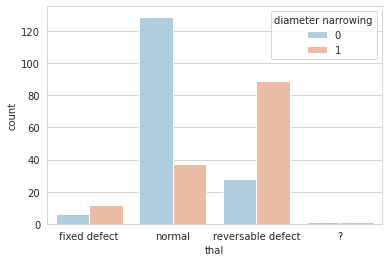

In [9]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='thal', hue='diameter narrowing', palette='RdBu_r')

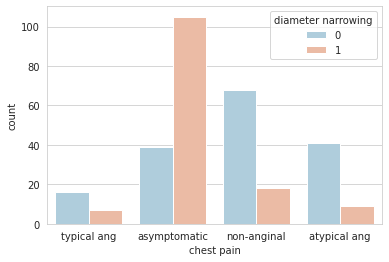

In [10]:
sns.countplot(data=df, x='chest pain', hue='diameter narrowing', palette='RdBu_r')

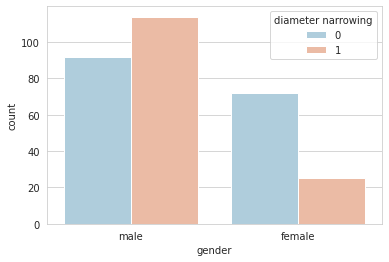

In [11]:
sns.countplot(data=df, x='gender', hue='diameter narrowing', palette='RdBu_r')

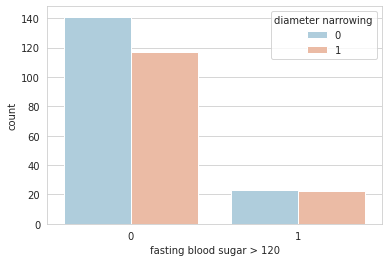

In [12]:
sns.countplot(data=df, x='fasting blood sugar > 120', hue='diameter narrowing', palette='RdBu_r')

!! **Almost all cases of fasting blood sugar > 120 have diameter narrowing!** !!

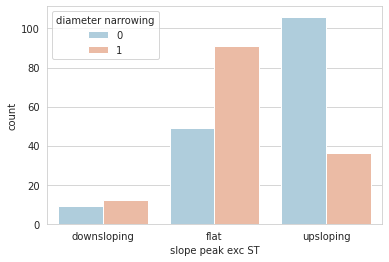

In [13]:
sns.countplot(data=df, x='slope peak exc ST', hue='diameter narrowing', palette='RdBu_r')

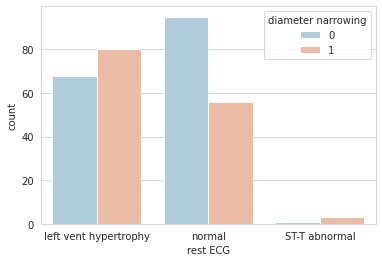

In [14]:
sns.countplot(data=df, x='rest ECG', hue='diameter narrowing', palette='RdBu_r')

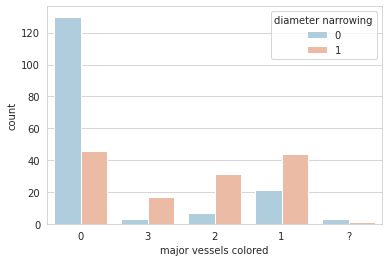

In [15]:
sns.countplot(data=df, x='major vessels colored', hue='diameter narrowing', palette='RdBu_r')

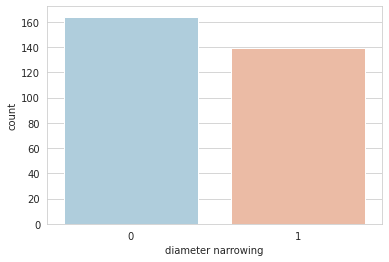

In [16]:
# Check whether the target classes are of equal size.
sns.countplot(data=df, x='diameter narrowing', palette='RdBu_r')

We see that the target classes are balanced. This means we have an equal amount of data for each class.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7babdb10>,
      dtype=object)

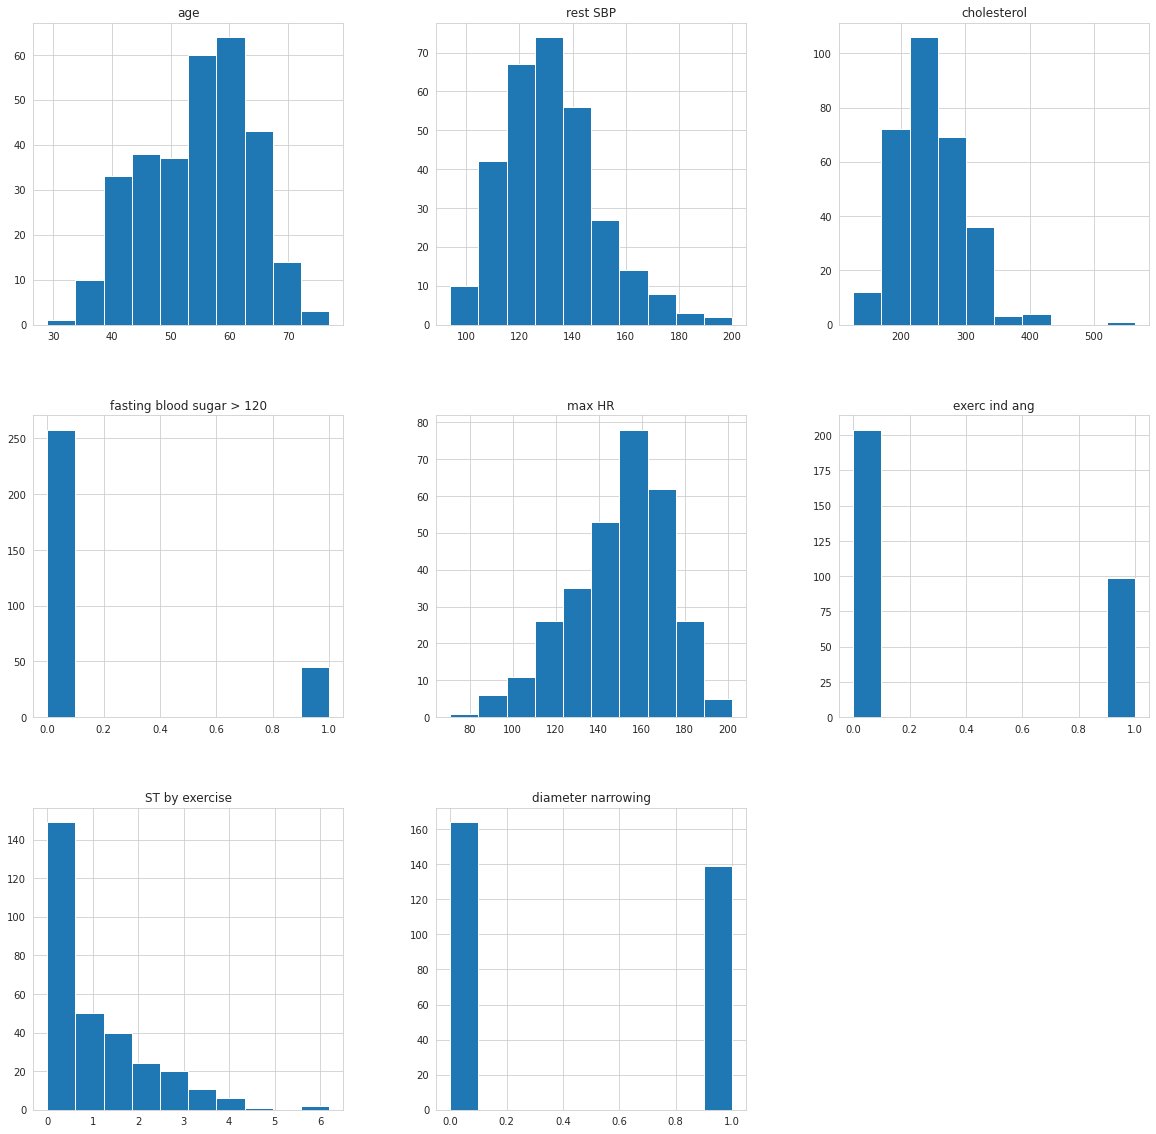

In [17]:
df.hist(figsize = (20, 20))

From the histograms we can see that *age*, *rest SBP*, *cholesterol* and *max HR* are more or less normally distributed.

# Missing values (липсващи стойности на атрибути)

We have two features with missing values. Both are categorical features so we can replace the missing values with the most common category.

In [18]:
df.isnull().sum()

age                          0
gender                       0
chest pain                   0
rest SBP                     0
cholesterol                  0
fasting blood sugar > 120    0
rest ECG                     0
max HR                       0
exerc ind ang                0
ST by exercise               0
slope peak exc ST            0
major vessels colored        0
thal                         0
diameter narrowing           0
dtype: int64

This function says that there are no null values. **However by looking carefully in the dataset, the column *major vessels colored* has non-numeric values.**

In [19]:
df['major vessels colored']

0      0
1      3
2      2
3      0
4      0
      ..
298    0
299    2
300    1
301    1
302    ?
Name: major vessels colored, Length: 303, dtype: object

In [20]:
df[df['major vessels colored'] == '?']

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
166,52,male,non-anginal,138,223,0,normal,169,0,0.0,upsloping,?,normal,0
192,43,male,asymptomatic,132,247,1,left vent hypertrophy,143,1,0.1,flat,?,reversable defect,1
287,58,male,atypical ang,125,220,0,normal,144,0,0.4,flat,?,reversable defect,0
302,38,male,non-anginal,138,175,0,normal,173,0,0.0,upsloping,?,normal,0


In [21]:
df['major vessels colored'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: major vessels colored, dtype: int64

In [22]:
# From the above result we see that the mean is 0. Hence, lets substite the missing values.
df.loc[df['major vessels colored'] == '?', 'major vessels colored'] = '0'
df['major vessels colored'].value_counts()

0    180
1     65
2     38
3     20
Name: major vessels colored, dtype: int64

In [23]:
df[df.thal == '?']

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
87,53,female,non-anginal,128,216,0,left vent hypertrophy,115,0,0.0,upsloping,0,?,0
266,52,male,asymptomatic,128,204,1,normal,156,1,1.0,flat,0,?,1


In [24]:
df.thal.value_counts()

normal               166
reversable defect    117
fixed defect          18
?                      2
Name: thal, dtype: int64

In [25]:
df.loc[df.thal == '?', 'thal'] = 'normal'
df.thal.value_counts()

normal               168
reversable defect    117
fixed defect          18
Name: thal, dtype: int64

# Outliers (крайни (екстремални) стойности)

age                             AxesSubplot(0.125,0.749828;0.227941x0.130172)
rest SBP                     AxesSubplot(0.398529,0.749828;0.227941x0.130172)
cholesterol                  AxesSubplot(0.672059,0.749828;0.227941x0.130172)
fasting blood sugar > 120       AxesSubplot(0.125,0.593621;0.227941x0.130172)
max HR                       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
exerc ind ang                AxesSubplot(0.672059,0.593621;0.227941x0.130172)
ST by exercise                  AxesSubplot(0.125,0.437414;0.227941x0.130172)
diameter narrowing           AxesSubplot(0.398529,0.437414;0.227941x0.130172)
dtype: object

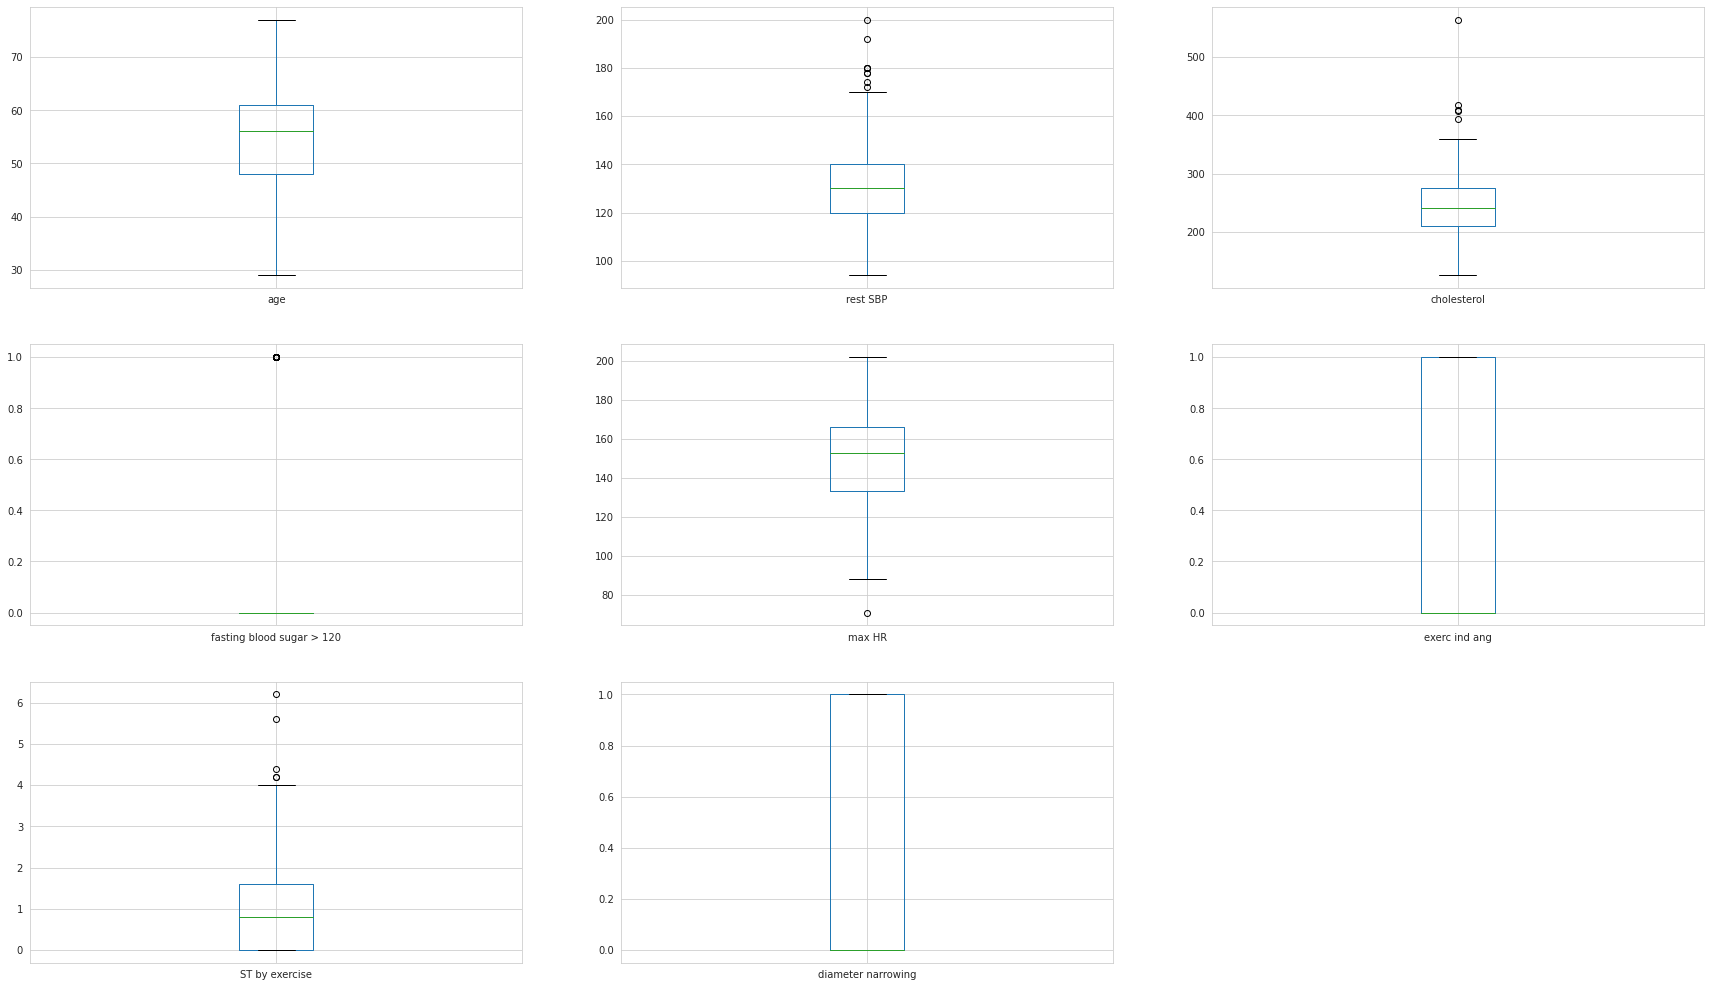

In [26]:
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(30, 30))

We see that almost all features have quite a bit of outliers!

# Exploratory Data Analysis (анализ на зависимостите, илюстрирани с подходящи визуализации)

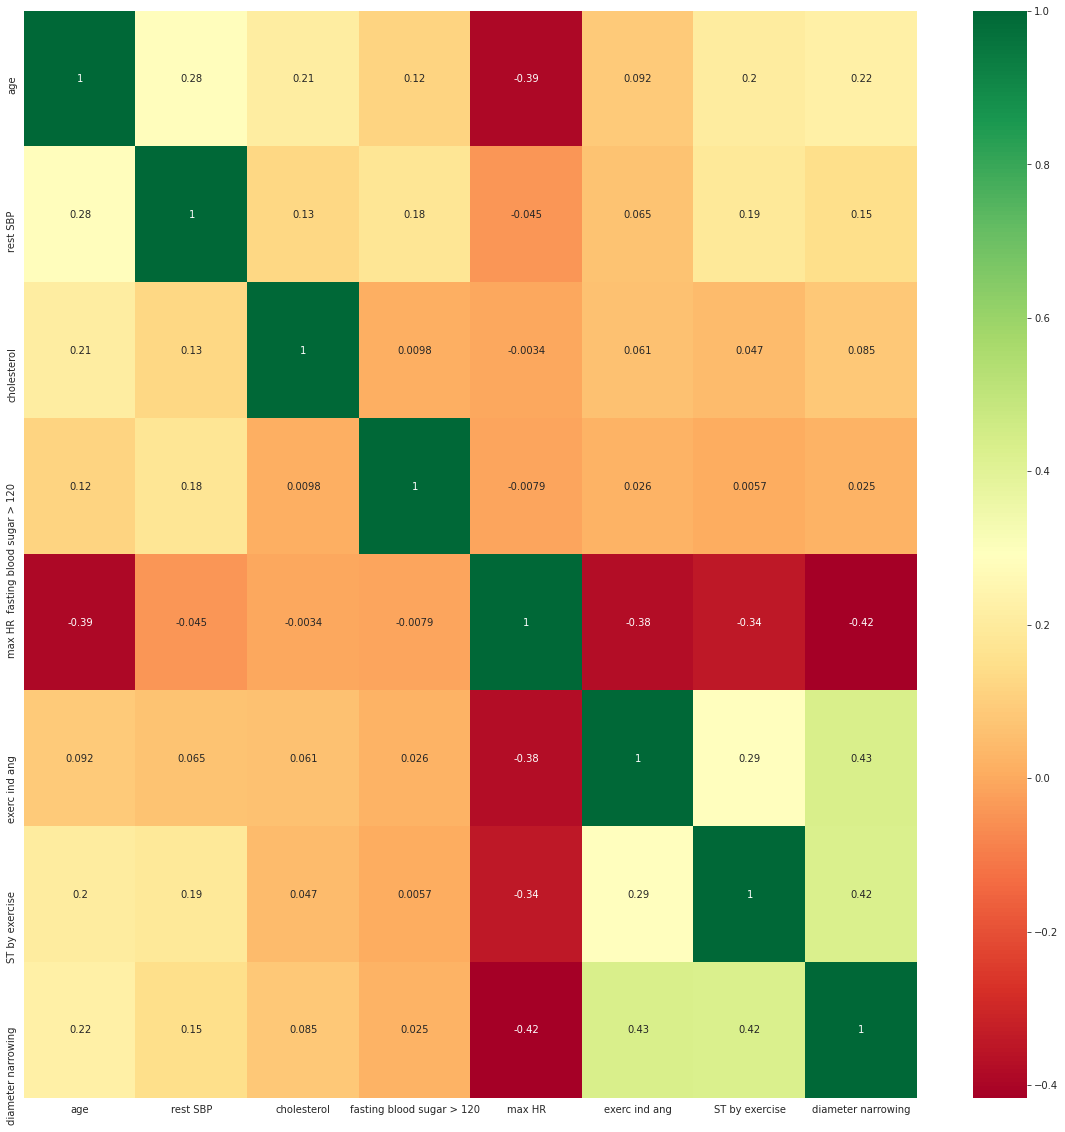

In [27]:
# Get the correlations for each feature
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))

# Plot them via a heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

By looking at the last row, we can see that *exerc ind ang* and *ST by exercise* have a positive correlation with the target variable (diameter norrowing). Hence, their values will be important to consider as the higher they are, the higher the change of diameter norrowing.

We can also use *max HR* as it is very negatively correlated - the lower it is, the higher the change of diameter norrowing.

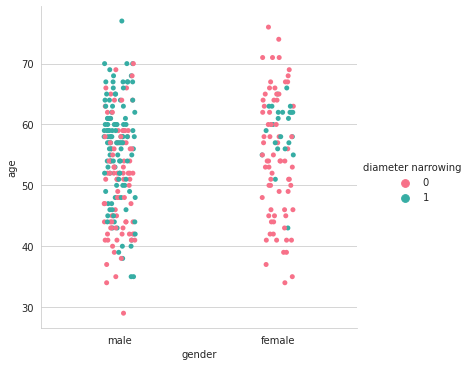

In [28]:
sns.catplot(data=df, x="gender", y="age", hue="diameter narrowing", palette="husl")

We see that males are more suspeptible to diameter narrowing!

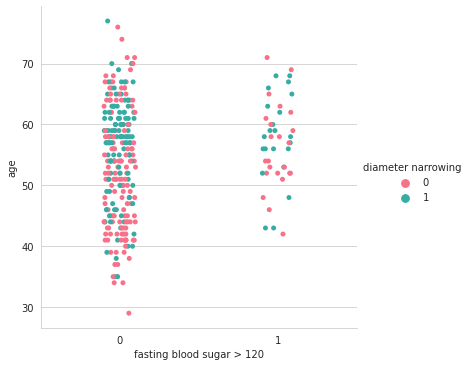

In [29]:
sns.catplot(data=df, x="fasting blood sugar > 120", y="age", hue="diameter narrowing", palette="husl")

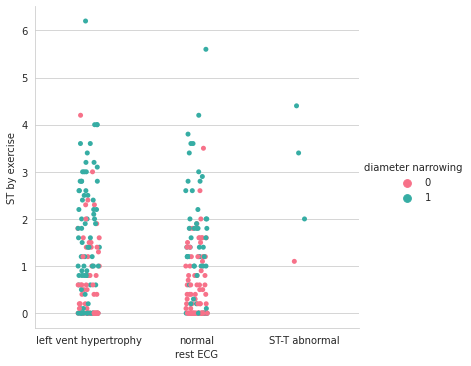

In [30]:
sns.catplot(data=df, x="rest ECG", y="ST by exercise", hue="diameter narrowing", palette="husl")

We see that if ST-T is abnormal that it is **3x more likely** to have a diameter narrowing. Also the higher the ST by exercise the higher the chance for diameter narrowing.

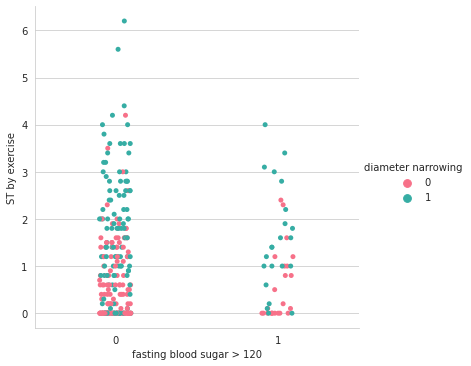

In [31]:
sns.catplot(data=df, x="fasting blood sugar > 120", y="ST by exercise", hue="diameter narrowing", palette="husl")

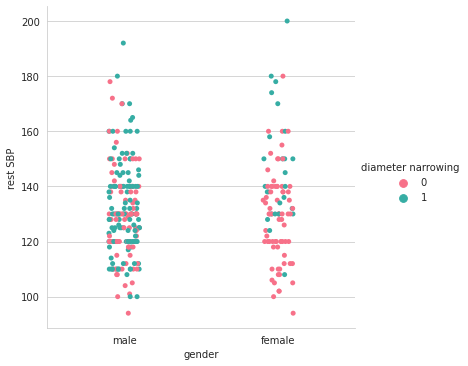

In [32]:
sns.catplot(data=df, x="gender", y="rest SBP", hue="diameter narrowing", palette="husl")

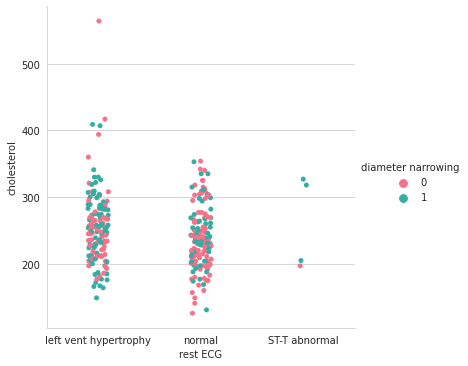

In [33]:
sns.catplot(data=df, x="rest ECG", y="cholesterol", hue="diameter narrowing", palette="husl")

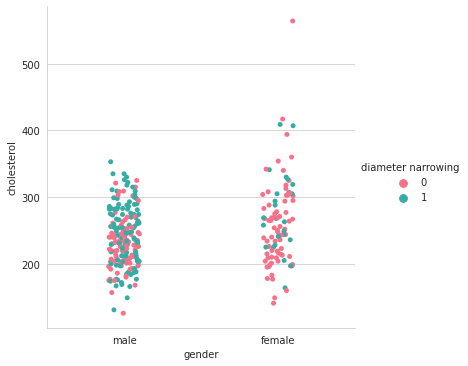

In [34]:
sns.catplot(data=df, x="gender", y="cholesterol", hue="diameter narrowing", palette="husl")

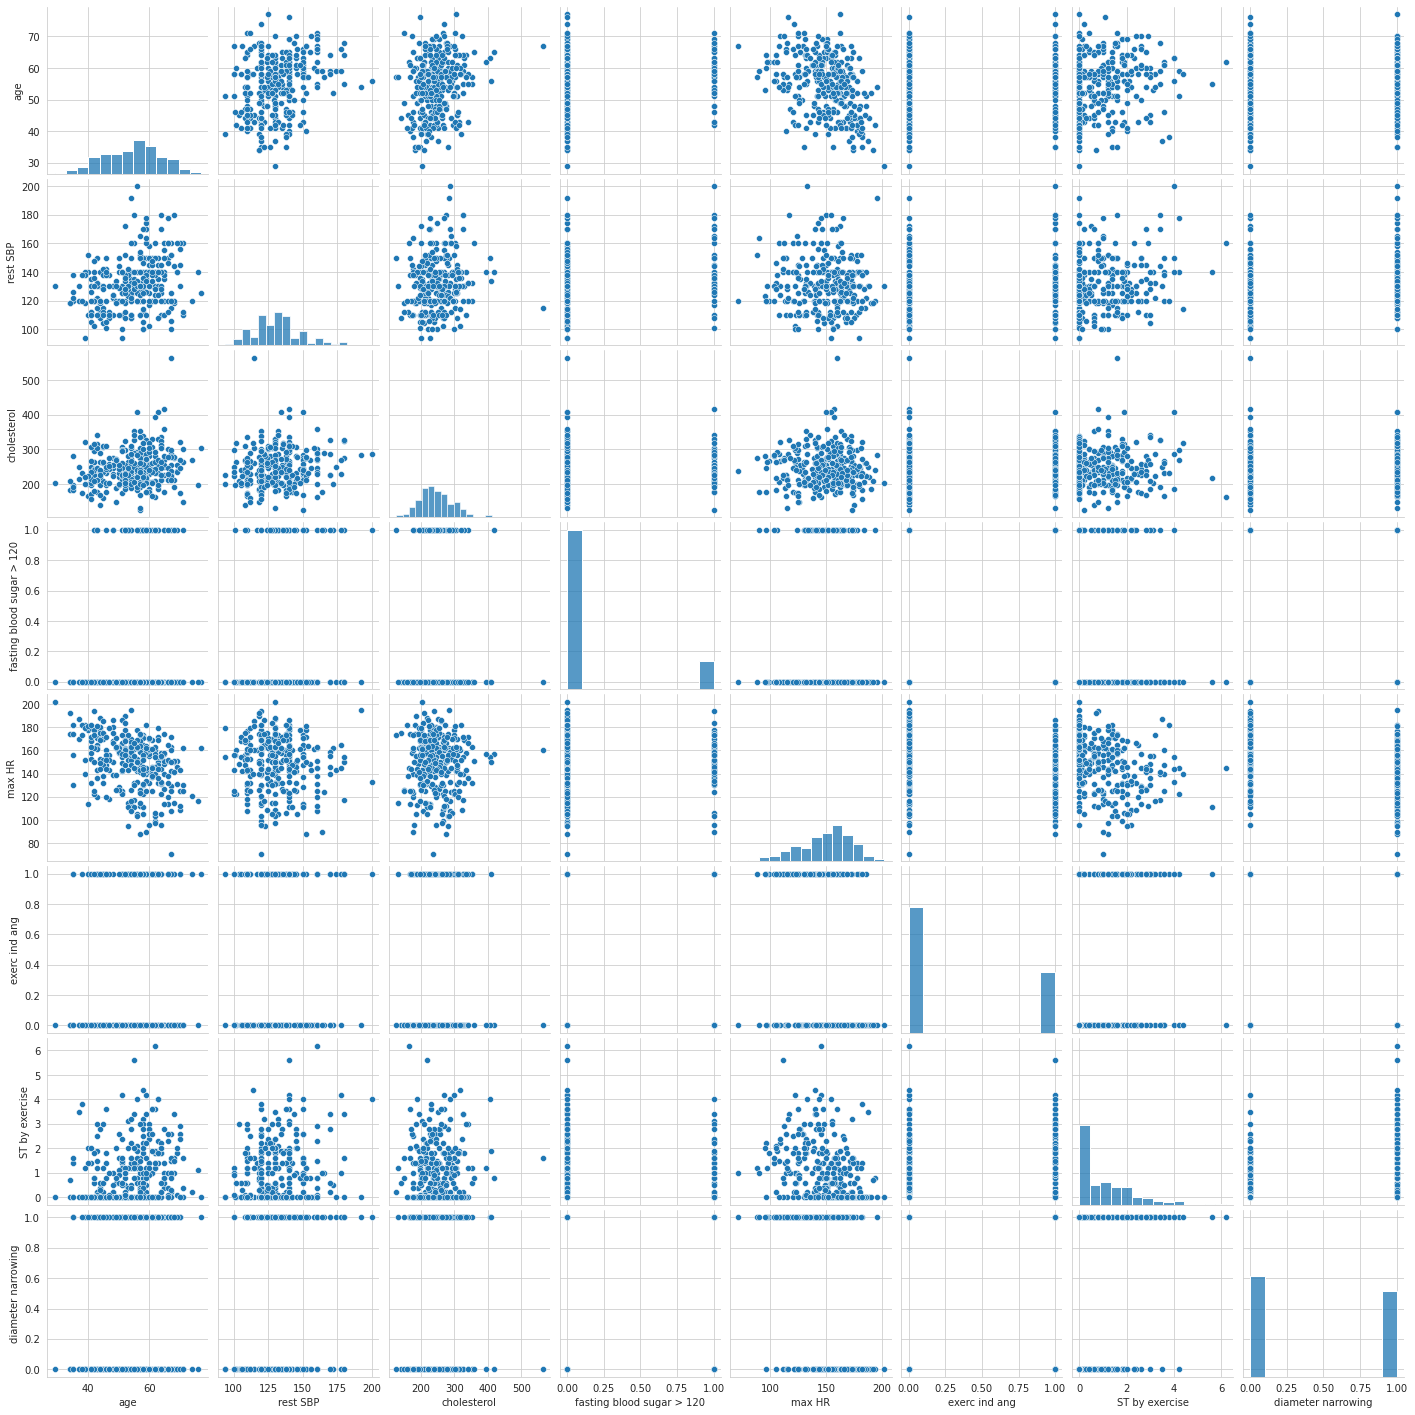

In [35]:
sns.pairplot(df)

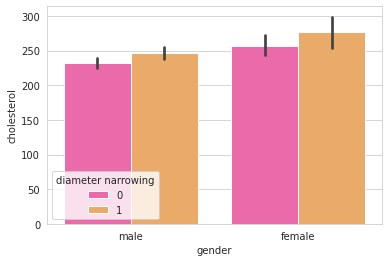

In [36]:
sns.barplot(data=df, x="gender", y="cholesterol", hue="diameter narrowing", palette="spring")

We see that males have lower cholesterol than females. As expected in both genders higher cholesterol is indicative to diameter narrowing!

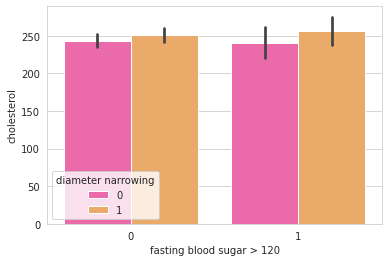

In [37]:
sns.barplot(data=df, x="fasting blood sugar > 120", y="cholesterol", hue="diameter narrowing", palette="spring")

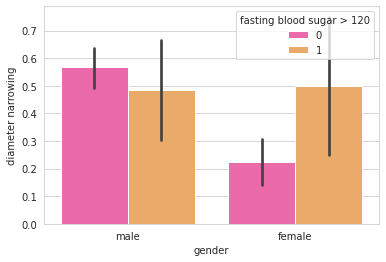

In [38]:
sns.barplot(data=df, x="gender", y="diameter narrowing", hue="fasting blood sugar > 120", palette="spring")

## Cross Tables!

In [39]:
gen = pd.crosstab(df.gender, df['diameter narrowing'])
gen

diameter narrowing,0,1
gender,,
female,72,25
male,92,114


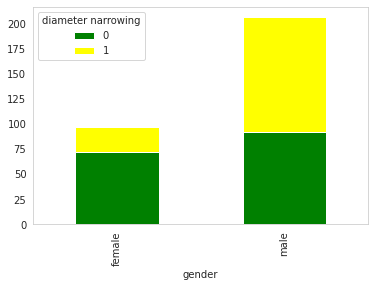

In [40]:
gen.plot(kind='bar', stacked=True, color=['green', 'yellow'], grid=False)

We see that the ratio for females to diameter narrowing is around 3/4, while for males it is 3/7.

In [41]:
temp = pd.crosstab(index=df.gender, columns=[df.thal], margins=True)
temp

thal,fixed defect,normal,reversable defect,All
gender,,,,
female,1,81,15,97
male,17,87,102,206
All,18,168,117,303


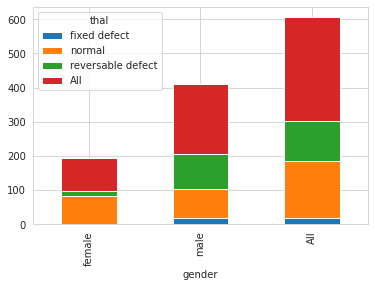

In [42]:
temp.plot(kind='bar', stacked='True')
plt.show()

In [43]:
temp = pd.crosstab(index=df['diameter narrowing'], columns=df.thal, margins=True)
temp

thal,fixed defect,normal,reversable defect,All
diameter narrowing,,,,
0,6,130,28,164
1,12,38,89,139
All,18,168,117,303


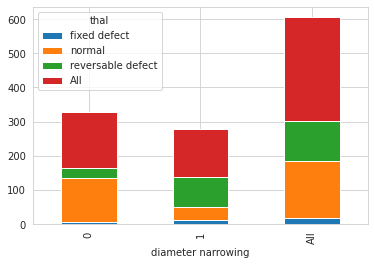

In [44]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [45]:
chest_pain = pd.crosstab(df['chest pain'], df['diameter narrowing'])
chest_pain

diameter narrowing,0,1
chest pain,,
asymptomatic,39,105
atypical ang,41,9
non-anginal,68,18
typical ang,16,7


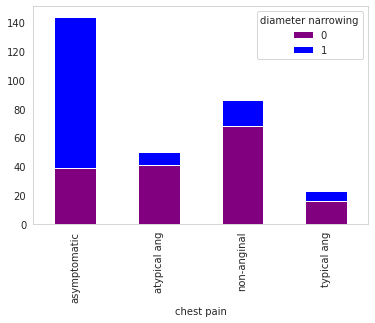

In [46]:
chest_pain.plot(kind='bar', stacked=True, color=['purple', 'blue'], grid=False)

# Feature Selection (избор на атрибутите, които предвиждат сърдечно-съдови заболявания)

In [47]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   gender                     303 non-null    object 
 2   chest pain                 303 non-null    object 
 3   rest SBP                   303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting blood sugar > 120  303 non-null    int64  
 6   rest ECG                   303 non-null    object 
 7   max HR                     303 non-null    int64  
 8   exerc ind ang              303 non-null    int64  
 9   ST by exercise             303 non-null    float64
 10  slope peak exc ST          303 non-null    object 
 11  major vessels colored      303 non-null    object 
 12  thal                       303 non-null    object 
 13  diameter narrowing         303 non-null    int64  

,age,gender,chest pain,rest SBP,cholesterol,fasting blood sugar > 120,rest ECG,max HR,exerc ind ang,ST by exercise,slope peak exc ST,major vessels colored,thal,diameter narrowing
0,63,male,typical ang,145,233,1,left vent hypertrophy,150,0,2.3,downsloping,0,fixed defect,0
1,67,male,asymptomatic,160,286,0,left vent hypertrophy,108,1,1.5,flat,3,normal,1
2,67,male,asymptomatic,120,229,0,left vent hypertrophy,129,1,2.6,flat,2,reversable defect,1
3,37,male,non-anginal,130,250,0,normal,187,0,3.5,downsloping,0,normal,0
4,41,female,atypical ang,130,204,0,left vent hypertrophy,172,0,1.4,upsloping,0,normal,0


After exploring the dataset we see that we have several categorical variables. They need to be converted into dummy variables before we apply any models.

The other numeric values need to be scaled to follow a standard normal distribution.

In [48]:
# Convert into dummy variables.
dataset = pd.get_dummies(df, columns = ['gender', 'chest pain', 'fasting blood sugar > 120', 'rest ECG', 'exerc ind ang', 'slope peak exc ST', 'major vessels colored', 'thal'])

In [49]:
dataset.head()

,age,rest SBP,cholesterol,max HR,ST by exercise,diameter narrowing,gender_female,gender_male,chest pain_asymptomatic,chest pain_atypical ang,chest pain_non-anginal,chest pain_typical ang,fasting blood sugar > 120_0,fasting blood sugar > 120_1,rest ECG_ST-T abnormal,rest ECG_left vent hypertrophy,rest ECG_normal,exerc ind ang_0,exerc ind ang_1,slope peak exc ST_downsloping,slope peak exc ST_flat,slope peak exc ST_upsloping,major vessels colored_0,major vessels colored_1,major vessels colored_2,major vessels colored_3,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0
1,67,160,286,108,1.5,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
2,67,120,229,129,2.6,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
4,41,130,204,172,1.4,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0


In [50]:
# Move the target column to the back
filter_cols = ['diameter narrowing']
dataset = dataset[[c for c in dataset if c not in filter_cols] + ['diameter narrowing']]

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             303 non-null    int64  
 1   rest SBP                        303 non-null    int64  
 2   cholesterol                     303 non-null    int64  
 3   max HR                          303 non-null    int64  
 4   ST by exercise                  303 non-null    float64
 5   gender_female                   303 non-null    uint8  
 6   gender_male                     303 non-null    uint8  
 7   chest pain_asymptomatic         303 non-null    uint8  
 8   chest pain_atypical ang         303 non-null    uint8  
 9   chest pain_non-anginal          303 non-null    uint8  
 10  chest pain_typical ang          303 non-null    uint8  
 11  fasting blood sugar > 120_0     303 non-null    uint8  
 12  fasting blood sugar > 120_1     303 

In [52]:
# train, validate, test = np.split(dataset.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) # a 60%, 20%, 20% split for training, validation and test sets.
# Decided to use the built-in function from sklearn, since I won't do cross-validation.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 0:28], dataset.iloc[:, -1])

In [53]:
X_train.head()

,age,rest SBP,cholesterol,max HR,ST by exercise,gender_female,gender_male,chest pain_asymptomatic,chest pain_atypical ang,chest pain_non-anginal,chest pain_typical ang,fasting blood sugar > 120_0,fasting blood sugar > 120_1,rest ECG_ST-T abnormal,rest ECG_left vent hypertrophy,rest ECG_normal,exerc ind ang_0,exerc ind ang_1,slope peak exc ST_downsloping,slope peak exc ST_flat,slope peak exc ST_upsloping,major vessels colored_0,major vessels colored_1,major vessels colored_2,major vessels colored_3,thal_fixed defect,thal_normal,thal_reversable defect
175,57,152,274,88,1.2,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
222,39,94,199,179,0.0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
166,52,138,223,169,0.0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
232,49,118,149,126,0.8,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
84,52,120,325,172,0.2,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0


In [54]:
y_train.head()

175    1
222    0
166    0
232    1
84     0
Name: diameter narrowing, dtype: int64

In [55]:
X_test.head()

,age,rest SBP,cholesterol,max HR,ST by exercise,gender_female,gender_male,chest pain_asymptomatic,chest pain_atypical ang,chest pain_non-anginal,chest pain_typical ang,fasting blood sugar > 120_0,fasting blood sugar > 120_1,rest ECG_ST-T abnormal,rest ECG_left vent hypertrophy,rest ECG_normal,exerc ind ang_0,exerc ind ang_1,slope peak exc ST_downsloping,slope peak exc ST_flat,slope peak exc ST_upsloping,major vessels colored_0,major vessels colored_1,major vessels colored_2,major vessels colored_3,thal_fixed defect,thal_normal,thal_reversable defect
157,58,125,300,171,0.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
190,50,129,196,163,0.0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
33,59,135,234,161,0.5,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
25,50,120,219,158,1.6,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0
244,60,120,178,96,0.0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0


In [56]:
y_test.head()

157    1
190    0
33     0
25     0
244    0
Name: diameter narrowing, dtype: int64

In [57]:
# Univariate Selection
# Chi-Squared test to get top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

number_features = 10

best_features = SelectKBest(score_func=chi2, k=number_features)
fit = best_features.fit(X_train, y_train)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['specs', 'score']

feature_scores.nlargest(number_features, 'score')

,specs,score
3,max HR,136.900422
4,ST by exercise,66.659128
27,thal_reversable defect,35.555598
26,thal_normal,32.471030
7,chest pain_asymptomatic,28.410103
17,exerc ind ang_1,25.495185
21,major vessels colored_0,22.200745
20,slope peak exc ST_upsloping,17.149826
5,gender_female,16.841930
2,cholesterol,16.249963


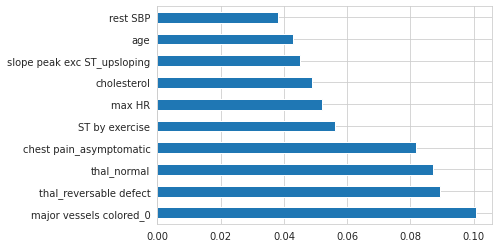

In [58]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

feat_imp = pd.Series(model.feature_importances_, index=X_train.columns)
feat_imp.nlargest(number_features).plot(kind='barh')
plt.show()

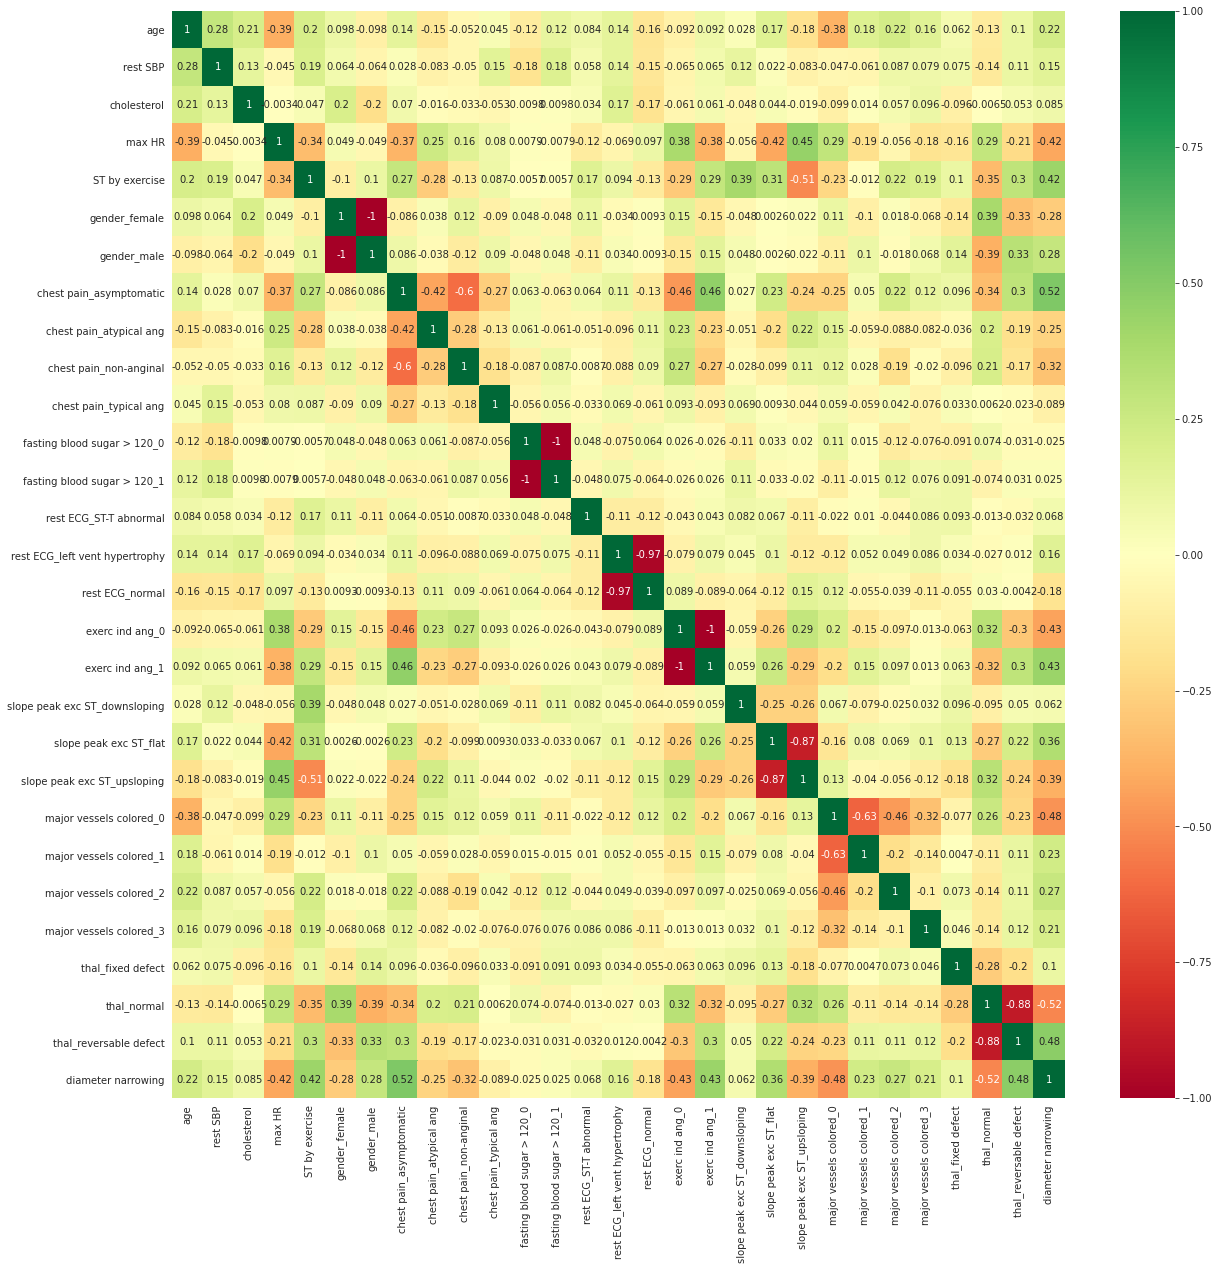

In [59]:
# Get the correlations for each feature
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))

# Plot them via a heat map
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

As a result of the three strategies, it seems that **the best features** are:
 - major vessels colored_0
 - thal_normal
 - chest pain_asymptomatic
 - thal_reversable defect
 - age
 - max_HR
 - exerc ind ang_1
 - ST by exercise
 - rest SBP

In [60]:
dataset.columns

Index(['age', 'rest SBP', 'cholesterol', 'max HR', 'ST by exercise',
       'gender_female', 'gender_male', 'chest pain_asymptomatic',
       'chest pain_atypical ang', 'chest pain_non-anginal',
       'chest pain_typical ang', 'fasting blood sugar > 120_0',
       'fasting blood sugar > 120_1', 'rest ECG_ST-T abnormal',
       'rest ECG_left vent hypertrophy', 'rest ECG_normal', 'exerc ind ang_0',
       'exerc ind ang_1', 'slope peak exc ST_downsloping',
       'slope peak exc ST_flat', 'slope peak exc ST_upsloping',
       'major vessels colored_0', 'major vessels colored_1',
       'major vessels colored_2', 'major vessels colored_3',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect',
       'diameter narrowing'],
      dtype='object')

# Logistic Regression

In [61]:
# Scale the numeric variables
scaler = StandardScaler()
columns_to_scale = ['age', 'rest SBP', 'cholesterol', 'max HR', 'ST by exercise']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [62]:
# Select best features!
filter_cols = [
    'major vessels colored_0',
    'thal_normal',
    'chest pain_asymptomatic',
    'thal_reversable defect',
    'age',
    'max_HR',
    'exerc ind ang_1',
    'ST by exercise',
    'rest SBP',
    'diameter narrowing',
]
dataset = dataset[[c for c in dataset if c in filter_cols]]
dataset.head()

,age,rest SBP,ST by exercise,chest pain_asymptomatic,exerc ind ang_1,major vessels colored_0,thal_normal,thal_reversable defect,diameter narrowing
0,0.948726,0.757525,1.087338,0,0,1,0,0,0
1,1.392002,1.611220,0.397182,1,1,0,1,0,1
2,1.392002,-0.665300,1.346147,1,1,0,0,1,1
3,-1.932564,-0.096170,2.122573,0,0,1,1,0,0
4,-1.489288,-0.096170,0.310912,0,0,1,1,0,0


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 0:28], dataset.iloc[:, -1])
model.fit(X_train,y_train)

pred_values = model.predict(X_test) 
accuracy_score(pred_values , y_test)

1.0

With the chosen attributes LogisticRegression is able to achive a of 100%!